In [1]:
import pandas as pd
import re
import nltk
import spacy
from num2words import num2words
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag
from spacy.pipeline import EntityRecognizer

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Read the JSON file into a DataFrame
#df = pd.read_json('/content/drive/MyDrive/Resume.json', lines=True)
df = pd.read_json('Resume.json', lines=True)

# Save the DataFrame to CSV
df.to_csv('dataframe.csv', index=None)

# Print the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

# Display the first few rows of the DataFrame
df.head()

Shape of the dataset: (200, 2)


,content,annotation
0,Govardhana K\nSenior Software Engineer\n\nBeng...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli\nTest Analyst at Oracle, Hy...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria\nData Analyst Intern - Oracle ...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin\nAssociate Consultant - State ...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari\njava developer\n\nPune, Maha...","[{'label': ['Skills'], 'points': [{'start': 18..."


In [4]:
df['content'][0]

'Govardhana K\nSenior Software Engineer\n\nBengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/\nb2de315d95905b68\n\nTotal IT experience 5 Years 6 Months\nCloud Lending Solutions INC 4 Month • Salesforce Developer\nOracle 5 Years 2 Month • Core Java Developer\nLanguages Core Java, Go Lang\nOracle PL-SQL programming,\nSales Force Developer with APEX.\n\nDesignations & Promotions\n\nWilling to relocate: Anywhere\n\nWORK EXPERIENCE\n\nSenior Software Engineer\n\nCloud Lending Solutions -  Bangalore, Karnataka -\n\nJanuary 2018 to Present\n\nPresent\n\nSenior Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2016 to December 2017\n\nStaff Consultant\n\nOracle -  Bangalore, Karnataka -\n\nJanuary 2014 to October 2016\n\nAssociate Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2012 to December 2013\n\nEDUCATION\n\nB.E in Computer Science Engineering\n\nAdithya Institute of Technology -  Tamil Nadu\n\nSeptember 2008 to June 2012\n\nhttps://www.

In [5]:
df['annotation'][0]

[{'label': ['Companies worked at'],
  'points': [{'start': 1749, 'end': 1754, 'text': 'Oracle'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1696, 'end': 1701, 'text': 'Oracle'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1417, 'end': 1422, 'text': 'Oracle'}]},
 {'label': ['Skills'],
  'points': [{'start': 1356,
    'end': 1792,
    'text': 'Languages: Core Java, Go Lang, Data Structures & Algorithms, Oracle\nPL-SQL programming, Sales Force with APEX.\nTools: RADTool, Jdeveloper, NetBeans, Eclipse, SQL developer,\nPL/SQL Developer, WinSCP, Putty\nWeb Technologies: JavaScript, XML, HTML, Webservice\n\nOperating Systems: Linux, Windows\nVersion control system SVN & Git-Hub\nDatabases: Oracle\nMiddleware: Web logic, OC4J\nProduct FLEXCUBE: Oracle FLEXCUBE Versions 10.x, 11.x and 12.x'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1209, 'end': 1214, 'text': 'Oracle'}]},
 {'label': ['Skills'],
  'points': [{'start': 1136,
    'end': 1247,


## Data Cleaning

In [6]:
df.isnull().sum()

content       0
annotation    0
dtype: int64

### Text Cleaning

In [7]:
def clean_text(resume):
    # Convert the text to lowercase
    resume = resume.lower()

    # Remove newlines
    resume = re.sub("\n", ' ', resume)

    # Remove special characters
    resume = re.sub(r'[,•()➢❑]', ' ', resume)

    # Remove extra whitespaces, dashes, and dots
    resume = re.sub(r'\s\s+|\s-\s|\.\s', ' ', resume)

    # Tokenize the text into words
    tokenized_words = resume.split(" ")

    length = len(tokenized_words)

    # Convert digits to words
    for i in range(length):
        if tokenized_words[i].isdigit():
            tokenized_words[i] = num2words(tokenized_words[i])

    # Remove stopwords
    sw = set(stopwords.words('english'))
    tokens_without_sw = []
    for w in tokenized_words:
        if w not in sw:
            tokens_without_sw.append(w)

    # Join the tokens back into a string
    final_resume = " ".join(tokens_without_sw)
 
    return final_resume

### Clean content column

In [8]:
content_resumes = df['content']

for i in range(0,200):
    content_resumes[i] = clean_text(content_resumes[i])

In [9]:
df['content'][0]

'govardhana k senior software engineer bengaluru karnataka karnataka email indeed: indeed.com/r/govardhana-k/ b2de315d95905b68 total experience five years six months cloud lending solutions inc four month salesforce developer oracle five years two month core java developer languages core java go lang oracle pl-sql programming sales force developer apex  designations & promotions willing relocate: anywhere work experience senior software engineer cloud lending solutions  bangalore karnataka  january two thousand and eighteen present present senior consultant oracle  bangalore karnataka  november two thousand and sixteen december two thousand and seventeen staff consultant oracle  bangalore karnataka  january two thousand and fourteen october two thousand and sixteen associate consultant oracle  bangalore karnataka  november two thousand and twelve december two thousand and thirteen education b.e computer science engineering adithya institute technology  tamil nadu september two thousand

In [10]:
df['content'][1]

"harini komaravelli test analyst oracle hyderabad hyderabad telangana email indeed: indeed.com/r/harini- komaravelli/2659eee82e435d1b six yrs experience manual automation testing  work experience qa analyst oracle test analyst oracle hyderabad infosys ltd  hyderabad telangana  november two thousand and eleven february two thousand and sixteen hyderabad nov two thousand and eleven feb17 two thousand and sixteen worked tata consultancy services hyderabad feb twenty-four apr eleven two thousand and seventeen currently working test analyst oracle hyderabad qa analyst six years experience oracle education mca osmania university b.sc computer science osmania university skills functional testing blue prism qtp additional information area expertise: familiar agile methodologies  knowledge energy petroleum & health care domains  involved preparation test scenarios  preparing test data test cases  https://www.indeed.com/r/harini-komaravelli/2659eee82e435d1b?isid=rex-download&ikw=download-top&co=

### Word Analysis

In [11]:
# We use the Tf-Idf vectorizer to gain insights about the probabilities of all the possible words and collocations
# we can find in these resumes.

# Create an instance of the Tf-Idf vectorizer with a specified ngram range
vect = TfidfVectorizer(ngram_range=(1, 3))

# Apply the Tf-Idf vectorizer to the 'content_resumes' data
tf_idf = vect.fit_transform(content_resumes)

# Retrieve the terms (words and collocations) in the same order as they appear in the tf_idf matrix
terms = vect.get_feature_names_out()

# Print the tf_idf matrix
print(tf_idf)


  (0, 344)	0.0392661003166396
  (0, 272)	0.0392661003166396
  (0, 137)	0.0392661003166396
  (0, 118959)	0.0392661003166396
  (0, 43688)	0.0392661003166396
  (0, 74443)	0.0392661003166396
  (0, 43683)	0.0392661003166396
  (0, 82323)	0.0392661003166396
  (0, 72530)	0.0392661003166396
  (0, 62382)	0.0392661003166396
  (0, 120304)	0.0392661003166396
  (0, 67734)	0.0392661003166396
  (0, 74524)	0.0392661003166396
  (0, 28603)	0.0392661003166396
  (0, 50074)	0.0392661003166396
  (0, 46406)	0.0392661003166396
  (0, 105593)	0.0392661003166396
  (0, 106190)	0.0392661003166396
  (0, 24520)	0.0392661003166396
  (0, 118928)	0.036428206199717955
  (0, 121189)	0.036428206199717955
  (0, 61877)	0.036428206199717955
  (0, 106376)	0.03285288244566607
  (0, 73835)	0.02873890004625888
  (0, 120480)	0.0392661003166396
  :	:
  (199, 53218)	0.008534517639336575
  (199, 3294)	0.008942340037136233
  (199, 123414)	0.01204278283231081
  (199, 73208)	0.010115007446032302
  (199, 99480)	0.007442812760637008
  (19

In [12]:
terms


array(['000', '000 servers', '000 servers trouble', ..., 'zxf05u01',
       'zxf05u01 validating', 'zxf05u01 validating vendor'], dtype=object)

In [13]:
### Showing the part of speech that these terms belong to

nltk.pos_tag(terms)

[('000', 'CD'),
 ('000 servers', 'NNS'),
 ('000 servers trouble', 'CD'),
 ('000members', 'NNS'),
 ('000members evaluatedpatientcareneeds', 'CD'),
 ('000members evaluatedpatientcareneeds prioritizedtreatment', 'CD'),
 ('0023411a049a1441', 'CD'),
 ('0023411a049a1441 challenging', 'VBG'),
 ('0023411a049a1441 challenging career', 'CD'),
 ('0023411a049a1441 isid', 'CD'),
 ('0023411a049a1441 isid rex', 'CD'),
 ('005e1ab800b4cb42', 'CD'),
 ('005e1ab800b4cb42 isid', 'CD'),
 ('005e1ab800b4cb42 isid rex', 'CD'),
 ('005e1ab800b4cb42 work', 'CD'),
 ('005e1ab800b4cb42 work experience', 'CD'),
 ('00f125c7b9b95a35', 'CD'),
 ('00f125c7b9b95a35 isid', 'CD'),
 ('00f125c7b9b95a35 isid rex', 'CD'),
 ('00f125c7b9b95a35 two', 'CD'),
 ('00f125c7b9b95a35 two year', 'CD'),
 ('01', 'CD'),
 ('01 crm', 'CD'),
 ('01 crm 02', 'CD'),
 ('01 dopra', 'CD'),
 ('01 dopra description', 'CD'),
 ('01 ethernet', 'CD'),
 ('01 ethernet routing', 'VBG'),
 ('01 tnc', 'CD'),
 ('01 tnc controller', 'CD'),
 ('01st', 'CD'),
 ('01st 

In [14]:
### Displaying the features table, where columns are the possible mono-, bi- and tri-grams in all of the resumes.
### We try to identify the most common words and collocations to use in our NER model, later.

pd.DataFrame.sparse.from_spmatrix(tf_idf, index = content_resumes, columns=terms)[0:2]

000  000 servers  \
content                                                                
govardhana k senior software engineer bengaluru...  0.0          0.0   
harini komaravelli test analyst oracle hyderaba...  0.0          0.0   

                                                    000 servers trouble  \
content                                                                   
govardhana k senior software engineer bengaluru...                  0.0   
harini komaravelli test analyst oracle hyderaba...                  0.0   

                                                    000members  \
content                                                          
govardhana k senior software engineer bengaluru...         0.0   
harini komaravelli test analyst oracle hyderaba...         0.0   

                                                    000members evaluatedpatientcareneeds  \
content                                                                                    
govardhana k senior software engineer bengaluru...                                   0.0   
harini komaravelli test analyst oracle hyderaba...                                   0.0   

                                                    000members evaluatedpatientcareneeds prioritizedtreatment  \
content                                                                                                         
govardhana k senior software engineer bengaluru...                                                0.0           
harini komaravelli test analyst oracle hyderaba...                                                0.0           

                                                    0023411a049a1441  \
content                                                                
govardhana k senior software engineer bengaluru...               0.0   
harini komaravelli test analyst oracle hyderaba...               0.0   

                                                    0023411a049a1441 challenging  \
content                                                                            
govardhana k senior software engineer bengaluru...                           0.0   
harini komaravelli test analyst oracle hyderaba...                           0.0   

                                                    0023411a049a1441 challenging career  \
content                                                                                   
govardhana k senior software engineer bengaluru...                                  0.0   
harini komaravelli test analyst oracle hyderaba...                                  0.0   

                                                    0023411a049a1441 isid  \
content                                                                     
govardhana k senior software engineer bengaluru...                    0.0   
harini komaravelli test analyst oracle hyderaba...                    0.0   

                                                    ...  zoom  zoom knowledge  \
content                                             ...                         
govardhana k senior software engineer bengaluru...  ...   0.0             0.0   
harini komaravelli test analyst oracle hyderaba...  ...   0.0             0.0   

                                                    zoom knowledge webrtc  \
content                                                                     
govardhana k senior software engineer bengaluru...                    0.0   
harini komaravelli test analyst oracle hyderaba...                    0.0   

                                                    zoom supporting  \
content                                                               
govardhana k senior software engineer bengaluru...              0.0   
harini komaravelli test analyst oracle hyderaba...              0.0   

                                                    zoom supporting bada2  \
content                                                                     
go

In [15]:
### Final Clean Resume Sample

print(content_resumes[1])

harini komaravelli test analyst oracle hyderabad hyderabad telangana email indeed: indeed.com/r/harini- komaravelli/2659eee82e435d1b six yrs experience manual automation testing  work experience qa analyst oracle test analyst oracle hyderabad infosys ltd  hyderabad telangana  november two thousand and eleven february two thousand and sixteen hyderabad nov two thousand and eleven feb17 two thousand and sixteen worked tata consultancy services hyderabad feb twenty-four apr eleven two thousand and seventeen currently working test analyst oracle hyderabad qa analyst six years experience oracle education mca osmania university b.sc computer science osmania university skills functional testing blue prism qtp additional information area expertise: familiar agile methodologies  knowledge energy petroleum & health care domains  involved preparation test scenarios  preparing test data test cases  https://www.indeed.com/r/harini-komaravelli/2659eee82e435d1b?isid=rex-download&ikw=download-top&co=i

In [16]:
### NLTK with word tokenization results in seperating urls

tokenized_words = word_tokenize(content_resumes[1])

nltk.pos_tag(tokenized_words)

[('harini', 'NN'),
 ('komaravelli', 'JJ'),
 ('test', 'NN'),
 ('analyst', 'NN'),
 ('oracle', 'NN'),
 ('hyderabad', 'NN'),
 ('hyderabad', 'NN'),
 ('telangana', 'NN'),
 ('email', 'VBP'),
 ('indeed', 'RB'),
 (':', ':'),
 ('indeed.com/r/harini-', 'JJ'),
 ('komaravelli/2659eee82e435d1b', 'NN'),
 ('six', 'CD'),
 ('yrs', 'NN'),
 ('experience', 'NN'),
 ('manual', 'JJ'),
 ('automation', 'NN'),
 ('testing', 'VBG'),
 ('work', 'NN'),
 ('experience', 'NN'),
 ('qa', 'JJ'),
 ('analyst', 'NN'),
 ('oracle', 'NN'),
 ('test', 'NN'),
 ('analyst', 'NN'),
 ('oracle', 'NN'),
 ('hyderabad', 'NN'),
 ('infosys', 'NN'),
 ('ltd', 'NN'),
 ('hyderabad', 'NN'),
 ('telangana', 'JJ'),
 ('november', 'RB'),
 ('two', 'CD'),
 ('thousand', 'NN'),
 ('and', 'CC'),
 ('eleven', 'RB'),
 ('february', 'JJ'),
 ('two', 'CD'),
 ('thousand', 'NN'),
 ('and', 'CC'),
 ('sixteen', 'JJ'),
 ('hyderabad', 'NN'),
 ('nov', 'RB'),
 ('two', 'CD'),
 ('thousand', 'NN'),
 ('and', 'CC'),
 ('eleven', 'RB'),
 ('feb17', 'JJ'),
 ('two', 'CD'),
 ('thousa

### Word Tagging

In [17]:
def tag_words(text):
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")

    # Process the text with the language model
    words = nlp(text)

    tagged = []

    # Iterate over each word in the processed text
    for word in words:
        # Print the word and its part-of-speech tag
        print(word, word.pos_)

        # Append the word and its part-of-speech tag to the tagged list
        tagged.append((word.text, word.pos_))

    return tagged

In [18]:
### Using spacy tagging is prone to errors

tag_words(content_resumes[1])

harini PROPN
komaravelli PROPN
test PROPN
analyst PROPN
oracle PROPN
hyderabad PROPN
hyderabad PROPN
telangana PROPN
email NOUN
indeed ADV
: PUNCT
indeed.com/r/harini- PROPN
komaravelli/2659eee82e435d1b PROPN
six NUM
yrs NOUN
experience NOUN
manual ADJ
automation NOUN
testing VERB
  SPACE
work NOUN
experience NOUN
qa NOUN
analyst NOUN
oracle PROPN
test PROPN
analyst NOUN
oracle PROPN
hyderabad PROPN
infosys PROPN
ltd PROPN
  SPACE
hyderabad PROPN
telangana PROPN
  SPACE
november PROPN
two NUM
thousand NUM
and CCONJ
eleven NUM
february NOUN
two NUM
thousand NUM
and CCONJ
sixteen NUM
hyderabad NOUN
nov PROPN
two NUM
thousand NUM
and CCONJ
eleven NUM
feb17 NUM
two NUM
thousand NUM
and CCONJ
sixteen NUM
worked VERB
tata NOUN
consultancy NOUN
services NOUN
hyderabad PROPN
feb PROPN
twenty PROPN
- PUNCT
four NUM
apr NOUN
eleven NUM
two NUM
thousand NUM
and CCONJ
seventeen NUM
currently ADV
working VERB
test NOUN
analyst NOUN
oracle PROPN
hyderabad PROPN
qa PROPN
analyst NOUN
six NUM
years NO

[('harini', 'PROPN'),
 ('komaravelli', 'PROPN'),
 ('test', 'PROPN'),
 ('analyst', 'PROPN'),
 ('oracle', 'PROPN'),
 ('hyderabad', 'PROPN'),
 ('hyderabad', 'PROPN'),
 ('telangana', 'PROPN'),
 ('email', 'NOUN'),
 ('indeed', 'ADV'),
 (':', 'PUNCT'),
 ('indeed.com/r/harini-', 'PROPN'),
 ('komaravelli/2659eee82e435d1b', 'PROPN'),
 ('six', 'NUM'),
 ('yrs', 'NOUN'),
 ('experience', 'NOUN'),
 ('manual', 'ADJ'),
 ('automation', 'NOUN'),
 ('testing', 'VERB'),
 (' ', 'SPACE'),
 ('work', 'NOUN'),
 ('experience', 'NOUN'),
 ('qa', 'NOUN'),
 ('analyst', 'NOUN'),
 ('oracle', 'PROPN'),
 ('test', 'PROPN'),
 ('analyst', 'NOUN'),
 ('oracle', 'PROPN'),
 ('hyderabad', 'PROPN'),
 ('infosys', 'PROPN'),
 ('ltd', 'PROPN'),
 (' ', 'SPACE'),
 ('hyderabad', 'PROPN'),
 ('telangana', 'PROPN'),
 (' ', 'SPACE'),
 ('november', 'PROPN'),
 ('two', 'NUM'),
 ('thousand', 'NUM'),
 ('and', 'CCONJ'),
 ('eleven', 'NUM'),
 ('february', 'NOUN'),
 ('two', 'NUM'),
 ('thousand', 'NUM'),
 ('and', 'CCONJ'),
 ('sixteen', 'NUM'),
 ('hyd

In [19]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\Nishchay
[nltk_data]     Vaid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nishchay
[nltk_data]     Vaid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
content_resumes

0      govardhana k senior software engineer bengalur...
1      harini komaravelli test analyst oracle hyderab...
2      hartej kathuria data analyst intern oracle ret...
3      ijas nizamuddin associate consultant state str...
4      imgeeyaul ansari java developer pune maharasht...
                             ...                        
195    mansi thanki student jamnagar gujarat email in...
196    anil kumar microsoft azure basic management de...
197    siddharth choudhary microsoft office suite exp...
198    valarmathi dhandapani investment banking opera...
199    pradeep kumar security analyst infosys career ...
Name: content, Length: 200, dtype: object

In [21]:
len(content_resumes)

200

In [22]:
content_resumes.describe()

count                                                   200
unique                                                  199
top       sameer kujur orrisha email indeed: indeed.com/...
freq                                                      2
Name: content, dtype: object

In [23]:
content_resumes.duplicated().sum()
#There is one duplicated row

1

In [24]:
content_resumes = content_resumes.drop_duplicates()

In [25]:
content_resumes.duplicated().sum()
#Now we don't have any duplicate rows

0

In [26]:
final_df = content_resumes.to_frame().copy()


In [27]:
final_df

,content
0,govardhana k senior software engineer bengalur...
1,harini komaravelli test analyst oracle hyderab...
2,hartej kathuria data analyst intern oracle ret...
3,ijas nizamuddin associate consultant state str...
4,imgeeyaul ansari java developer pune maharasht...
...,...
195,mansi thanki student jamnagar gujarat email in...
196,anil kumar microsoft azure basic management de...
197,siddharth choudhary microsoft office suite exp...
198,valarmathi dhandapani investment banking opera...


In [29]:
#FINDING AVARAGE WORD LENGTH, TOTAL WORD COUNT, TOTAL CHARACTERS IN THE CONTENT COLUMN

#Function calculates the avarage length of each word in content column
#Apply the get_avg_word_len function to each element in the 'content' column of the DataFrame
#Convert x to a string to handle cases where x might be NaN or non-string values
#Assign the resulting average word lengths to a new column named 'avg_word_len'

def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len += len(word)
    return word_len / len(words)

final_df['avg_word_len'] = final_df['content'].apply(lambda x: get_avg_word_len(str(x)))

In [30]:
#Apply the lambda function to each element in the 'content' column of the DataFrame
#Convert x to a string to handle cases where x might be NaN or non-string values
#Split the string into individual words using the split() method
#Calculate the length of the resulting list of words using len()
#Assign the total word count to a new column named 'total_word_count'

final_df['total_word_count'] = final_df['content'].apply(lambda x: len(str(x).split()))

In [31]:
#Apply the lambda function to each element in the 'content' column of the DataFrame
#Convert x to a string to handle cases where x might be NaN or non-string values
#Calculate the length of the resulting string using len()
#Assign the total character count to a new column named 'total_characters'

final_df['total_characters'] = final_df['content'].apply(lambda x: len(str(x)))

In [32]:
final_df.head(5)

,content,avg_word_len,total_word_count,total_characters
0,govardhana k senior software engineer bengalur...,7.755760,217,1910
1,harini komaravelli test analyst oracle hyderab...,7.383764,542,4570
2,hartej kathuria data analyst intern oracle ret...,6.975439,285,2275
3,ijas nizamuddin associate consultant state str...,7.262729,491,4068
4,imgeeyaul ansari java developer pune maharasht...,6.503788,264,1995


# Exploratory Data Analysis

### Parts of Speech Analysis

In [34]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from textblob import TextBlob

[nltk_data] Downloading package punkt to C:\Users\Nishchay
[nltk_data]     Vaid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nishchay Vaid\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to C:\Users\Nishchay
[nltk_data]     Vaid\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [35]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [36]:
blob = TextBlob(str(final_df['content']))
blob.tags

[('0', 'CD'),
 ('govardhana', 'NN'),
 ('k', 'NN'),
 ('senior', 'JJ'),
 ('software', 'NN'),
 ('engineer', 'NN'),
 ('bengalur', 'NN'),
 ('1', 'CD'),
 ('harini', 'NN'),
 ('komaravelli', 'JJ'),
 ('test', 'NN'),
 ('analyst', 'NN'),
 ('oracle', 'NN'),
 ('hyderab', 'NN'),
 ('2', 'CD'),
 ('hartej', 'NN'),
 ('kathuria', 'NNS'),
 ('data', 'NNS'),
 ('analyst', 'NN'),
 ('intern', 'JJ'),
 ('oracle', 'NN'),
 ('ret', 'NN'),
 ('3', 'CD'),
 ('ijas', 'JJ'),
 ('nizamuddin', 'JJ'),
 ('associate', 'NN'),
 ('consultant', 'NN'),
 ('state', 'NN'),
 ('str', 'NN'),
 ('4', 'CD'),
 ('imgeeyaul', 'NN'),
 ('ansari', 'NN'),
 ('java', 'NN'),
 ('developer', 'NN'),
 ('pune', 'NN'),
 ('maharasht', 'NN'),
 ('195', 'CD'),
 ('mansi', 'NN'),
 ('thanki', 'NN'),
 ('student', 'NN'),
 ('jamnagar', 'NN'),
 ('gujarat', 'NN'),
 ('email', 'NN'),
 ('in', 'IN'),
 ('196', 'CD'),
 ('anil', 'JJ'),
 ('kumar', 'NN'),
 ('microsoft', 'JJ'),
 ('azure', 'NN'),
 ('basic', 'JJ'),
 ('management', 'NN'),
 ('de', 'NN'),
 ('197', 'CD'),
 ('siddhart

In [37]:
pos_df = pd.DataFrame(blob.tags, columns = ['words', 'pos'])
pos_df.head()

,words,pos
0,0,CD
1,govardhana,NN
2,k,NN
3,senior,JJ
4,software,NN


In [38]:
pos_df = pos_df['pos'].value_counts()
pos_df

pos
NN     51
JJ     12
CD     11
NNS     2
IN      1
NNP     1
Name: count, dtype: int64

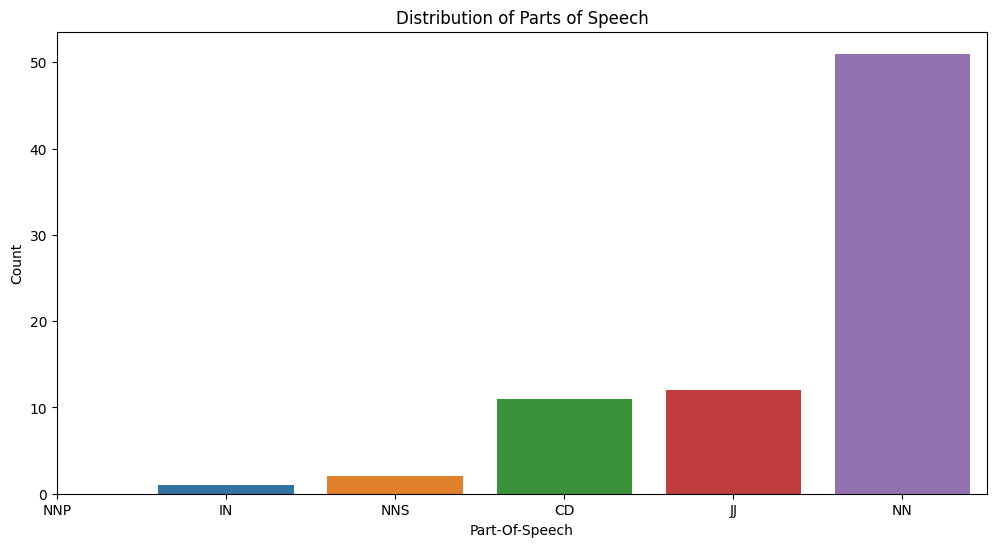

In [39]:
plt.figure(figsize = (12, 6))
sns.barplot(data = pos_df, y = pos_df.index, x = pos_df.values);
labels = list(pos_df.index)
labels.reverse()
plt.xticks(np.arange(6) - 1.0, labels)
plt.title('Distribution of Parts of Speech')
plt.ylabel('Count')
plt.xlabel('Part-Of-Speech')
plt.show();

<br>
<center><b>CONCLUSION</b></center>

* `Nouns occur the most in the resume content`


In [40]:
%matplotlib notebook
from nltk import FreqDist
from typing import Iterable
import matplotlib.pyplot as plt

# Function to flatten a nested list
def flatten(lis):
    for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:
            yield item

# Get the tokenized resumes
tokenized_resumes = list(final_df['content'])

# Split each resume into a list of words
for i in range(len(tokenized_resumes)):
    tokenized_resumes[i] = str(tokenized_resumes[i]).split(" ")

# Flatten the list of lists into a single list
tokenized_resumes = list(flatten(tokenized_resumes))

# Compute the frequency distribution
freq_dist = FreqDist(tokenized_resumes)

<IPython.core.display.Javascript object>


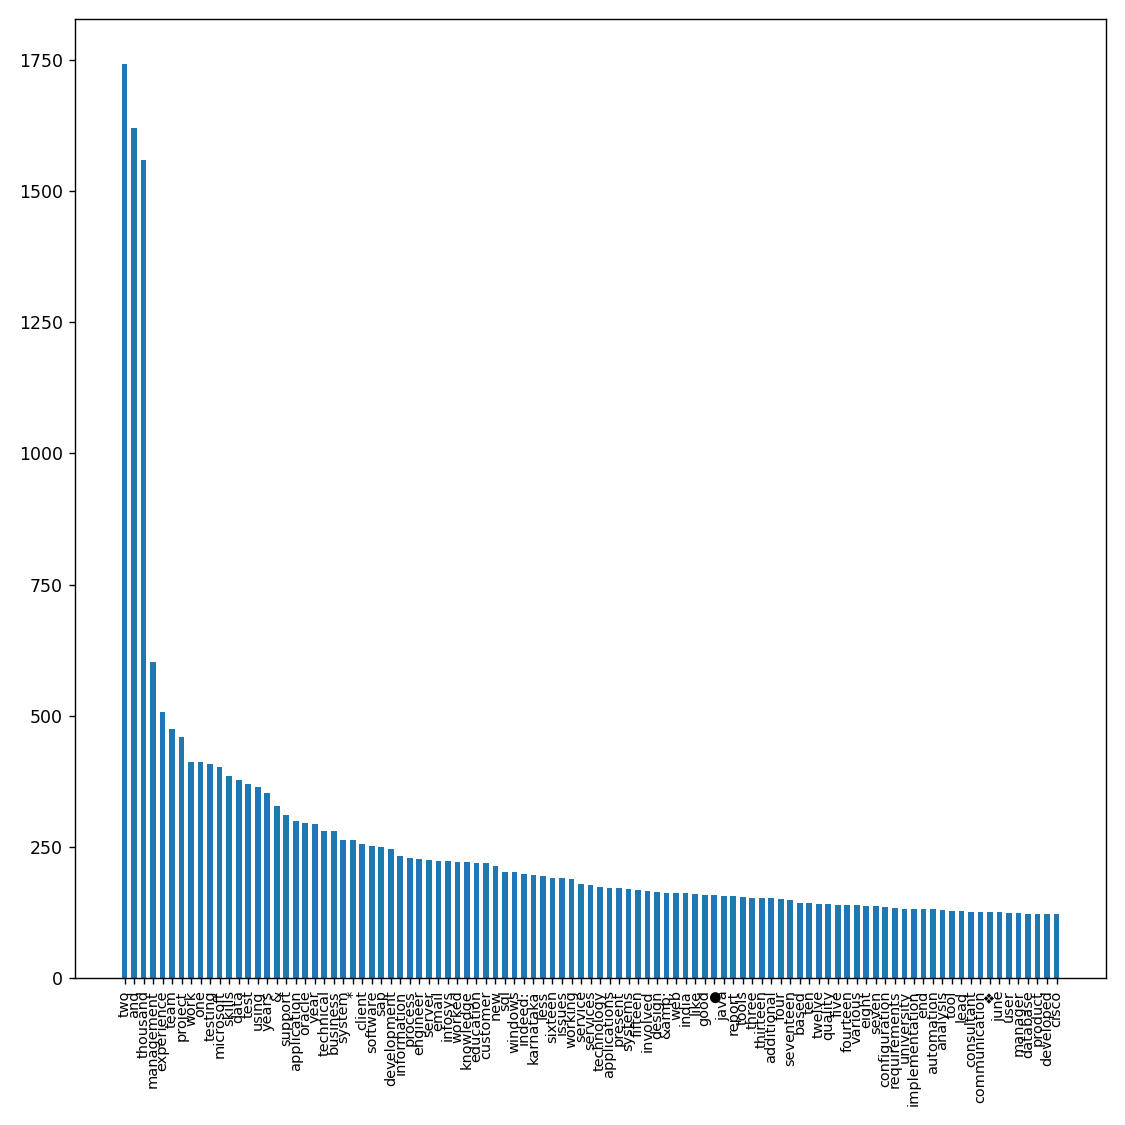

In [41]:
# Select the 100 most common words
fd_common100 = freq_dist.most_common(100)

# Extract the words and frequencies
words = []
frequency = []

# Iterate over the range from 1 to 100
for i in range(1, 100):
    words.append(fd_common100[i][0])
    frequency.append(fd_common100[i][1])

# Create a figure with a size of 9x9 inches
plt.figure(figsize=(9, 9))

# Plot the bar chart
plt.bar(words, frequency, width=0.6)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90, fontsize='small')

# Adjust the layout of the plot elements
plt.tight_layout()

# Show the plot
plt.show()


<br>
<center><b>CONCLUSION</b></center>

Some useful insights which can be derived from the above bar graph are as follows :


* `The term "experience" ranked as the fifth most commonly used word, highlighting the significant value placed on experience compared to education within the job market.`

* `Management experience is the fourth most sought after skill looked in the job being applied`
* `Microsoft and Oracle emerged as the most frequently cited companies on the applicants' resumes.`


In [43]:
import matplotlib.pyplot as pyplt
import seaborn as sns

In [44]:
final_df.head(1)

,content,avg_word_len,total_word_count,total_characters
0,govardhana k senior software engineer bengalur...,7.75576,217,1910


<IPython.core.display.Javascript object>


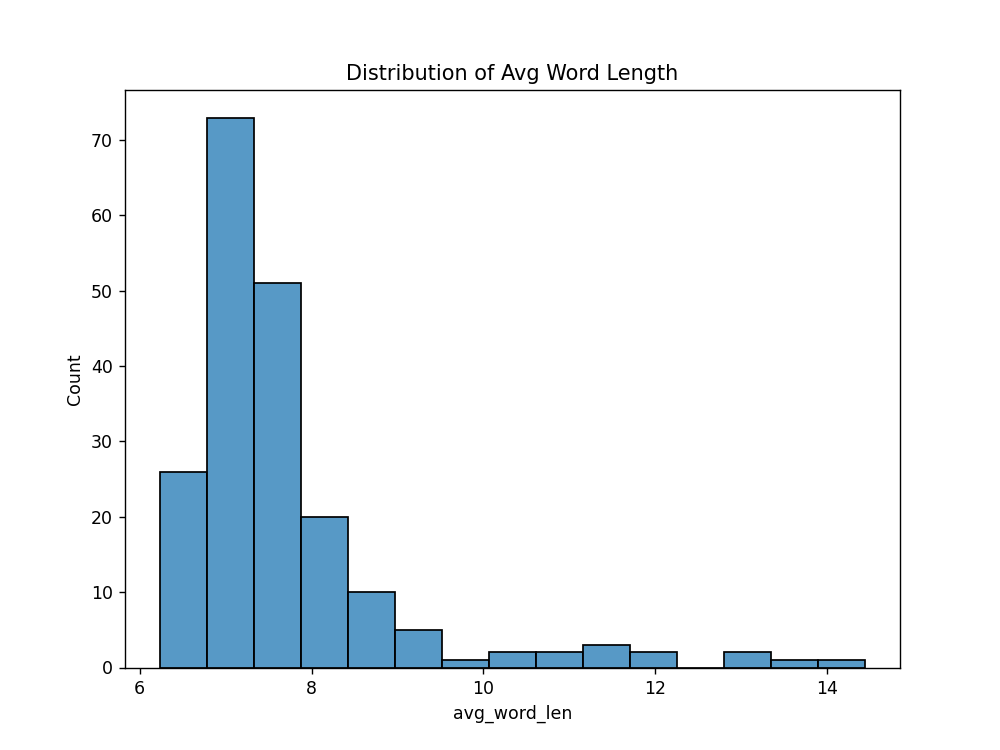

In [45]:
pyplt.figure(figsize=(8, 6))
sns.histplot(final_df['avg_word_len'], bins=15);
pyplt.title('Distribution of Avg Word Length')
pyplt.show()

<br>
<center><b>CONCLUSION</b></center>

* `Bar plot shows that most of the resumes in our dataframe have avarage word length 7`
* `More than 70 rows(resumes) have avarage word lenght 7`

<IPython.core.display.Javascript object>


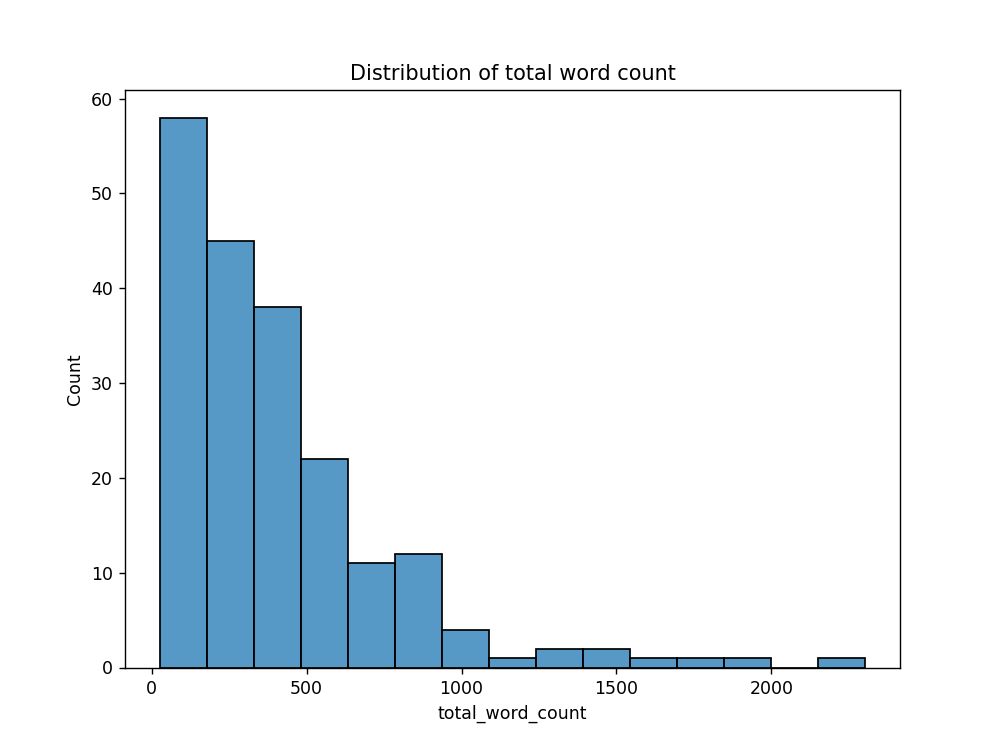

In [46]:
pyplt.figure(figsize=(8, 6))
sns.histplot(final_df['total_word_count'], bins=15);
pyplt.title('Distribution of total word count')
pyplt.show()


<br>
<center><b>CONCLUSION</b></center>

* `More than 120 resumes have total word count less than 500.`
* `There are less resumes that have more than 500 words`
* `Number of resumes which contains more than 1000 word is very few.`

<IPython.core.display.Javascript object>


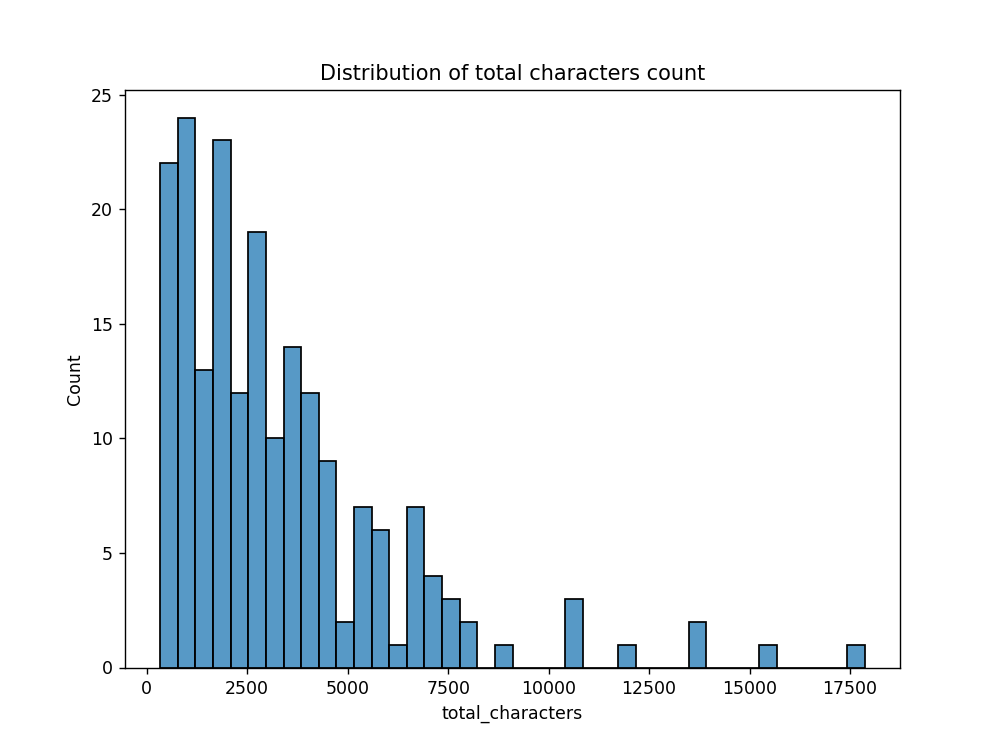

In [60]:
pyplt.figure(figsize=(8, 6))
sns.histplot(final_df['total_characters'], bins=40);
pyplt.title('Distribution of total characters count')
pyplt.show()

<br>
<center><b>CONCLUSION</b></center>

* `Most of the resumes have total characters less than 5000.`

In [48]:
#FINDING MOST COMMON STOPWORDS IN THE CONTENT COLUMN
from collections import Counter
from wordcloud import STOPWORDS

#The code analyzes the 'content' column in a DataFrame and extracts individual words.
#It counts the frequency of each word and filters out common stop words using a predefined set.
#The most frequent stop words are then printed.
words = []


for val in final_df['content']:
    words.extend(str(val).split())

#Create a Counter object to count the frequency of each word
word_counts = Counter(words)
stopword_counts = {word: count for word, count in word_counts.items() if word in STOPWORDS}

sorted_stopwords = sorted(stopword_counts.items(), key=lambda x: x[1], reverse=True)

#LIST
common_stopwords = [word for word in STOPWORDS if word in word_counts.keys()]
common_stopwords.append('https')

commonnums=['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten','thousand']
for i in commonnums:
  common_stopwords.append(i)
#Print the most common stop words and their frequencies
for word, count in sorted_stopwords[:25]:
    print(f'{word}: {count}')

and: 1619
like: 161
also: 79
get: 25
r: 17
since: 16
http: 11
would: 10
i'm: 6
k: 4
hence: 3
else: 2
that's: 2
could: 2
i've: 2
otherwise: 2
ever: 1
however: 1
what's: 1
why's: 1
shall: 1


<br>
<center><b>CONCLUSION</b></center>

* `Most common stopwords used in the resumes are 'and', 'like', 'also'`

<IPython.core.display.Javascript object>


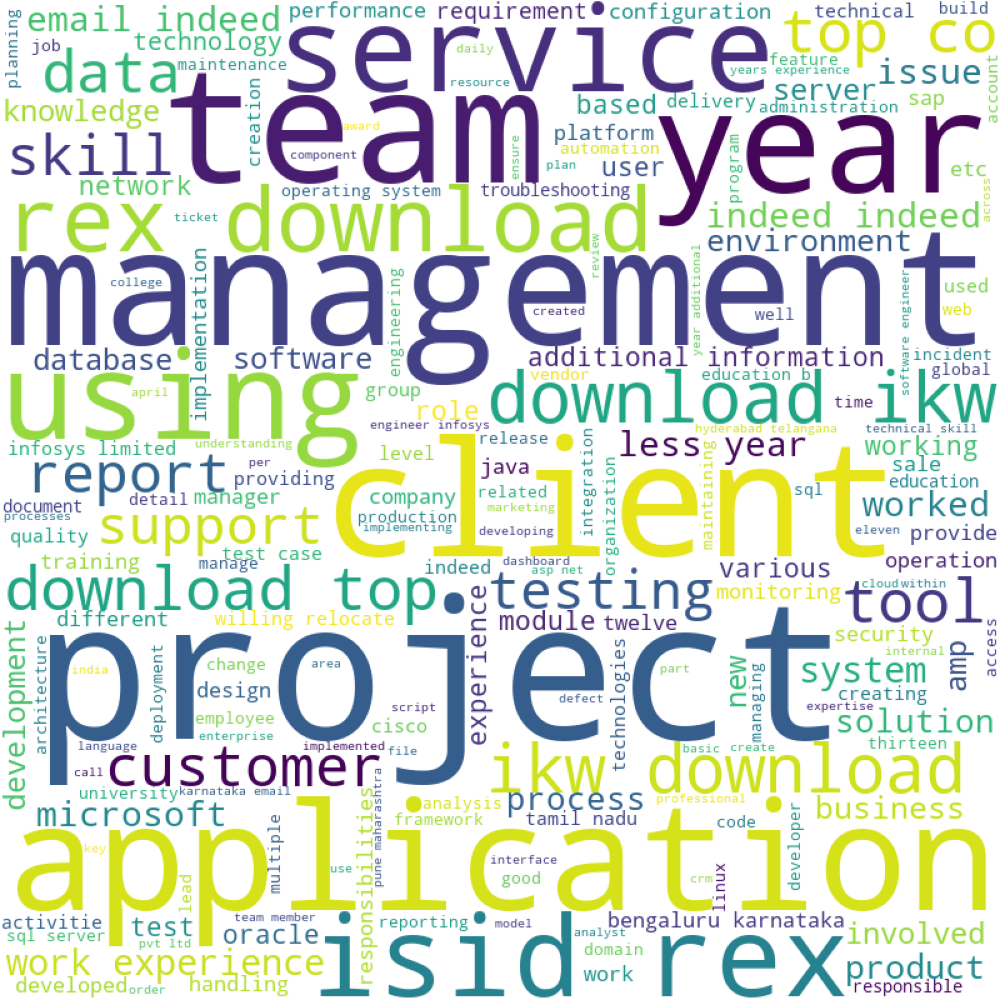

In [49]:
#CREATING WORD CLOUD(FINDING MOST FREQUENT WORDS IN RESUMES)

#The code generates a word cloud visualization based on the 'content' column of a DataFrame.
#It removes common stop words and converts the text to lowercase before creating the word cloud.
#The word cloud represents the most frequent words in the text, with larger words indicating higher frequency.
#The resulting word cloud is displayed.


import matplotlib.pyplot as pyplt
from wordcloud import WordCloud, STOPWORDS

cleaned_text = ""
stopwords = set(STOPWORDS)
stopwords.update(common_stopwords)


for value in final_df.content:
    value = str(value)
    tokens = value.split()
    tokens = [token.lower() for token in tokens if token.lower() not in stopwords]
    cleaned_text += " ".join(tokens) + " "


max_words = 50
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(cleaned_text)


pyplt.figure(figsize=(8, 8), facecolor=None)
pyplt.imshow(wordcloud)
pyplt.axis("off")
pyplt.tight_layout(pad=0)

pyplt.show()

<br>
<center><b>CONCLUSION</b></center>

* `Word cloud emphasize that most common words in the resumes excluding stopwords are 'application', 'team',
   'management', 'year', 'project', 'client', 'service'`

In [50]:
#N-GRAM ANALYSIS
import nltk
from nltk import ngrams
from collections import Counter


#The code utilizes NLTK to perform n-gram analysis on the 'content' column of a DataFrame.
#It converts the content into a list of strings, joins them together, and tokenizes the resulting text into individual words.
#It then calculates the counts of unigrams, bigrams, and trigrams using the ngrams function and stores the counts in separate Counter objects.
#This allows for the analysis of the frequency of n-grams in the text data.

import nltk
from nltk import ngrams
from collections import Counter


content_series = final_df['content']


content_list = content_series.astype(str).tolist()


all_content = ' '.join(content_list)

words = nltk.word_tokenize(all_content)


unigrams = list(ngrams(words, 1))
unigram_counts = Counter(unigrams)


bigrams = list(ngrams(words, 2))
bigram_counts = Counter(bigrams)


trigrams = list(ngrams(words, 3))
trigram_counts = Counter(trigrams)




In [51]:
print("Most common unigrams:")
for unigram, count in unigram_counts.most_common(60):
    print(unigram, count)

Most common unigrams:
(':',) 2135
('two',) 1741
('and',) 1621
('thousand',) 1620
('&',) 1089
('management',) 621
('experience',) 520
('project',) 492
('team',) 484
('skills',) 435
('testing',) 419
('work',) 412
('one',) 412
('microsoft',) 407
('data',) 380
('test',) 369
('using',) 365
('years',) 356
('client',) 324
('https',) 322
('support',) 313
('application',) 304
('oracle',) 299
('year',) 294
('*',) 294
('technical',) 282
('business',) 282
('system',) 280
('?',) 277
('isid=rex-download',) 276
('ikw=download-top',) 276
('co=in',) 276
('software',) 266
('sap',) 253
(';',) 252
('development',) 248
('information',) 234
('process',) 229
('engineer',) 228
('infosys',) 228
('knowledge',) 227
('server',) 227
('customer',) 227
('email',) 225
('worked',) 223
('education',) 220
('new',) 214
('tools',) 212
('sql',) 203
('windows',) 202
('indeed',) 200
('systems',) 199
('karnataka',) 196
('less',) 194
('issues',) 194
('sixteen',) 191
('working',) 189
('services',) 182
('service',) 182
('applica

In [52]:
print("Most common bigrams:")
for bigram, count in bigram_counts.most_common(60):
    print(bigram, count)

Most common bigrams:
('two', 'thousand') 1557
('thousand', 'and') 1536
('https', ':') 316
('?', 'isid=rex-download') 276
('isid=rex-download', '&') 276
('&', 'ikw=download-top') 276
('ikw=download-top', '&') 276
('&', 'co=in') 276
('one', 'year') 262
('work', 'experience') 211
('email', 'indeed') 199
('indeed', ':') 199
('less', 'one') 192
('and', 'sixteen') 184
('&', 'amp') 177
('amp', ';') 177
('and', 'fifteen') 158
('and', 'thirteen') 145
('and', 'seventeen') 144
('additional', 'information') 140
('and', 'fourteen') 134
('and', 'twelve') 129
('june', 'two') 120
('and', 'ten') 112
('responsibilities', ':') 108
('bengaluru', 'karnataka') 107
('and', 'eleven') 104
('and', 'eight') 98
('july', 'two') 87
('willing', 'relocate') 86
('infosys', 'limited') 86
('tamil', 'nadu') 83
('hundred', 'and') 83
('may', 'two') 82
('two', 'years') 82
('co=in', 'https') 80
('december', 'two') 77
('september', 'two') 72
('january', 'two') 71
('october', 'two') 69
('and', 'seven') 68
('test', 'cases') 64


In [53]:
print("Most common trigrams:")
for trigram, count in trigram_counts.most_common(60):
    print(trigram, count)

Most common trigrams:
('two', 'thousand', 'and') 1532
('?', 'isid=rex-download', '&') 276
('isid=rex-download', '&', 'ikw=download-top') 276
('&', 'ikw=download-top', '&') 276
('ikw=download-top', '&', 'co=in') 276
('email', 'indeed', ':') 199
('less', 'one', 'year') 192
('thousand', 'and', 'sixteen') 184
('&', 'amp', ';') 177
('thousand', 'and', 'fifteen') 157
('thousand', 'and', 'thirteen') 145
('thousand', 'and', 'seventeen') 144
('thousand', 'and', 'fourteen') 134
('thousand', 'and', 'twelve') 128
('june', 'two', 'thousand') 120
('thousand', 'and', 'ten') 108
('thousand', 'and', 'eleven') 103
('thousand', 'and', 'eight') 98
('july', 'two', 'thousand') 87
('may', 'two', 'thousand') 82
('&', 'co=in', 'https') 80
('co=in', 'https', ':') 80
('december', 'two', 'thousand') 77
('september', 'two', 'thousand') 72
('january', 'two', 'thousand') 71
('october', 'two', 'thousand') 69
('thousand', 'and', 'seven') 68
('august', 'two', 'thousand') 64
('march', 'two', 'thousand') 62
('february', 

<IPython.core.display.Javascript object>


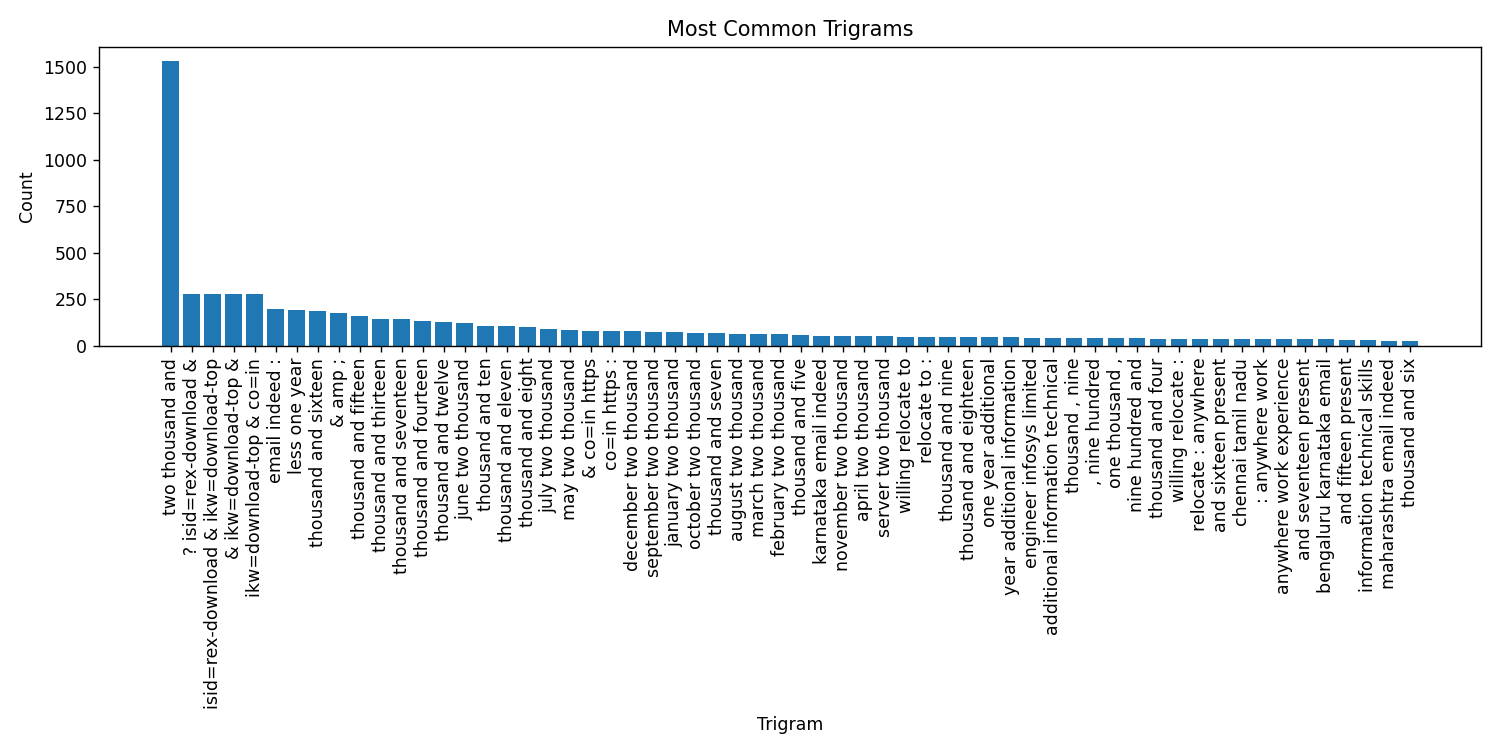

In [54]:
labels = [trigram[0] + ' ' + trigram[1] + ' ' + trigram[2] for trigram, count in trigram_counts.most_common(60)]
counts = [count for trigram, count in trigram_counts.most_common(60)]

pyplt.figure(figsize=(12, 6))
pyplt.bar(labels, counts)
pyplt.xticks(rotation=90)
pyplt.xlabel('Trigram')
pyplt.ylabel('Count')
pyplt.title('Most Common Trigrams')
pyplt.tight_layout()
pyplt.show()

<IPython.core.display.Javascript object>


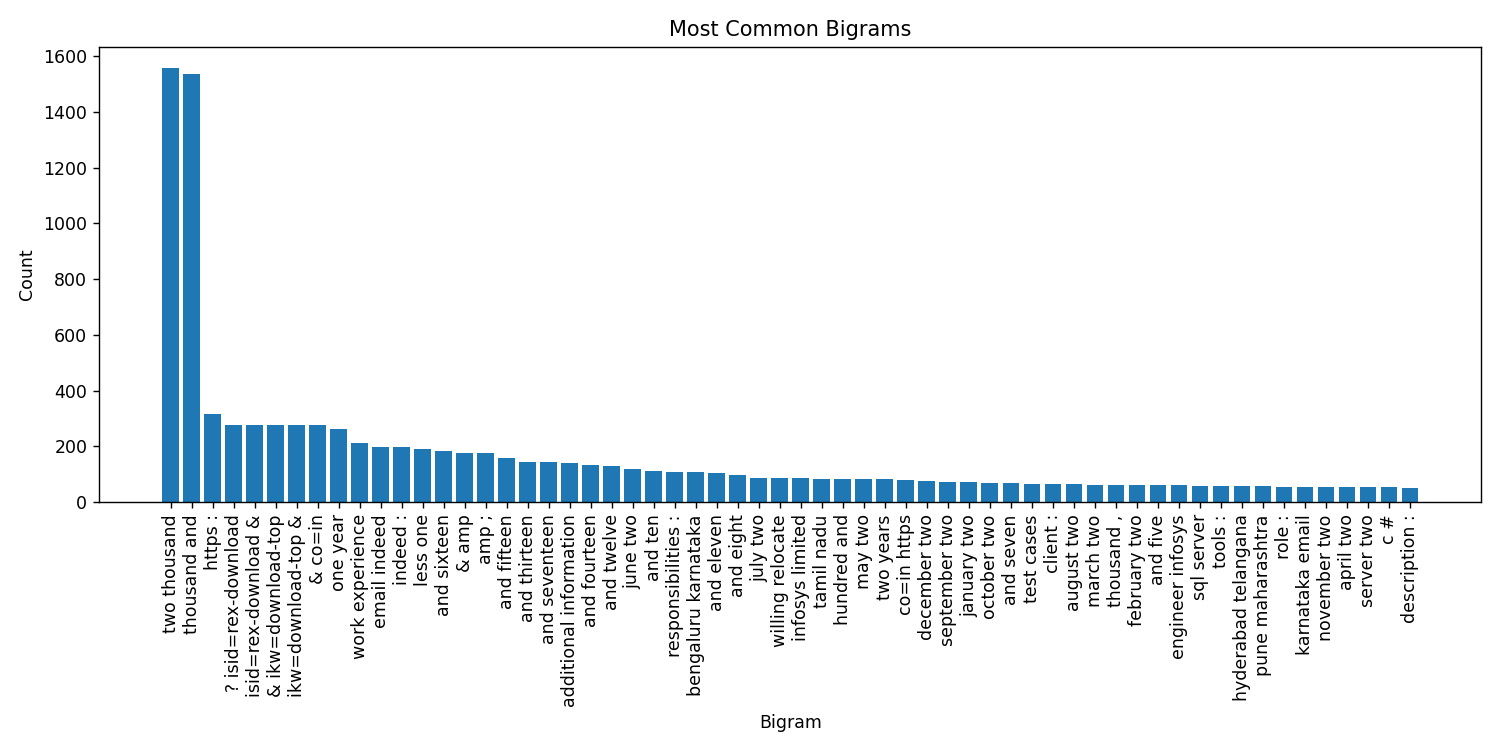

In [55]:
labels = [bigram[0] + ' ' + bigram[1] for bigram, count in bigram_counts.most_common(60)]
counts = [count for bigram, count in bigram_counts.most_common(60)]


pyplt.figure(figsize=(12, 6))
pyplt.bar(labels, counts)
pyplt.xticks(rotation=90)
pyplt.xlabel('Bigram')
pyplt.ylabel('Count')
pyplt.title('Most Common Bigrams')
pyplt.tight_layout()
pyplt.show()


<IPython.core.display.Javascript object>


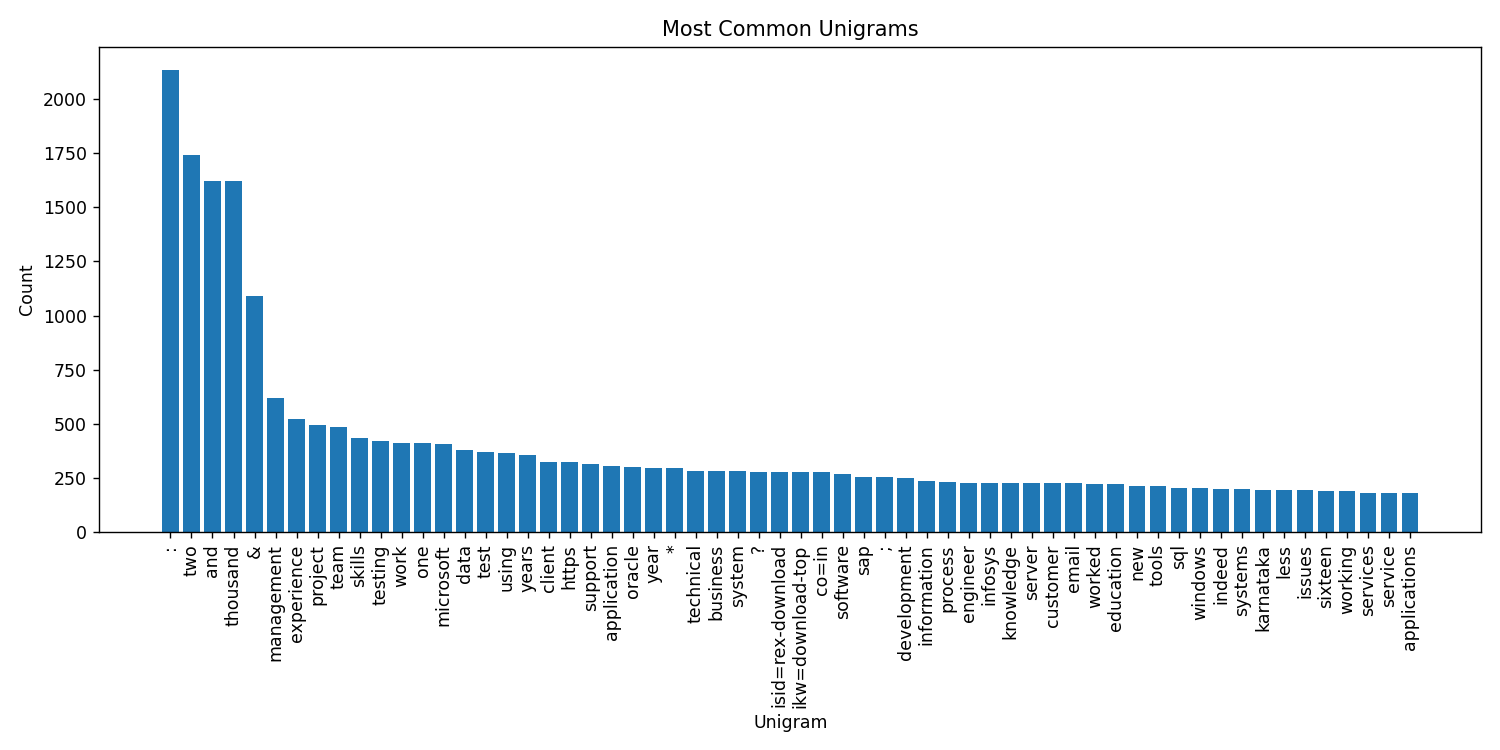

In [56]:

most_common_unigrams = unigram_counts.most_common(60)
labels = [' '.join(unigram) for unigram, count in most_common_unigrams]
counts = [count for unigram, count in most_common_unigrams]


pyplt.figure(figsize=(12, 6))
pyplt.bar(labels, counts)
pyplt.xticks(rotation=90)
pyplt.xlabel('Unigram')
pyplt.ylabel('Count')
pyplt.title('Most Common Unigrams')
pyplt.tight_layout()
pyplt.show()


In [57]:
df

,content,annotation
0,govardhana k senior software engineer bengalur...,"[{'label': ['Companies worked at'], 'points': ..."
1,harini komaravelli test analyst oracle hyderab...,"[{'label': ['Companies worked at'], 'points': ..."
2,hartej kathuria data analyst intern oracle ret...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,ijas nizamuddin associate consultant state str...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,imgeeyaul ansari java developer pune maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18..."
...,...,...
195,mansi thanki student jamnagar gujarat email in...,"[{'label': ['College Name'], 'points': [{'star..."
196,anil kumar microsoft azure basic management de...,"[{'label': ['Location'], 'points': [{'start': ..."
197,siddharth choudhary microsoft office suite exp...,"[{'label': ['Skills'], 'points': [{'start': 78..."
198,valarmathi dhandapani investment banking opera...,"[{'label': ['Skills'], 'points': [{'start': 92..."


In [ ]:
my_dict = {}
key = []
value = []
for x in df['annotation']:
    for y in x:
        if y['label'] == ['Name']:
            for z in y['points']:
                key.append(z['text'])
        if y['label'] == ['Location']:
            for z in y['points']:
                value.append(z['text'])
        keytuple = tuple(key)
        valuetuple = tuple(value)
        for (a,b) in zip(keytuple,valuetuple):
            my_dict[a] = b
print(my_dict)

In [ ]:
locationslist = list(my_dict.values())
print(locationslist)
len(locationslist)

In [ ]:
locationsset = set(my_dict.values())
len(locationsset)
print(locationsset)
locationsseries = pd.Series(locationslist)
locationsdataframe = pd.DataFrame(locationsseries.value_counts())
locationsdataframe.head()
locationsdataframe.to_csv('locationscount.csv')

In [ ]:
#Importing matplotlib package again
import matplotlib as plt
import geopandas as gpd
# Load the shapefile
shapefile_path = r"C:\Users\gbore\Downloads\india_state.geojson"
# Replace with the actual path to the shapefile
india_map = gpd.read_file(shapefile_path)
#Viewing dataframe, plot and type of the Indian states map
print(india_map)
india_map.plot()
type(india_map)


In [ ]:
#Importing necessary packages again
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Reading in data on how many workers are in each state
finalcountdf = pd.read_csv('readlocationscount.csv')
#Viewing the data
finalcountdf.head()
#Merging data
merged_data = finalcountdf.merge(india_map, on='NAME_1', how='outer')
# Replace NaN values with 0s in Count column to make sure all states display themselves
merged_data['Count'].fillna(0, inplace=True)
#Getting an accurate count of applicants in each state
raw_series =  merged_data.groupby('NAME_1')['Count'].sum()
#Converting this series to a dataframe
raw_df = pd.DataFrame(raw_series)
#Looking at merged_data and its type
print(merged_data)
type(merged_data)

In [ ]:
#Looking at raw_data and its type
print(raw_df)
type(raw_df)

In [ ]:
#Merging data
final_geodf = raw_df.merge(india_map, on='NAME_1', how='outer')
print(final_geodf)
type(final_geodf)

In [ ]:
#Importing necessary packages again
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#Converting to GeoDataFrame and plotting
gdf = gpd.GeoDataFrame(final_geodf)
gdf.plot(column='Count', cmap='YlOrRd', linewidth=0.8, edgecolor='Black', vmin =0, vmax=70, legend=True)

# Add a title and display the plot
plt.title('Number of Values by State')
plt.show()